# [DeepSphere]: a spherical convolutional neural network
[DeepSphere]: https://github.com/SwissDataScienceCenter/DeepSphere

[Nathanaël Perraudin](https://perraudin.info), [Michaël Defferrard](http://deff.ch), Tomasz Kacprzak, Raphael Sgier

# Figure: network architecture

In [1]:
%pylab inline
import healpy as hp
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:100% !important; }</style>"))
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

pl = plt

In [3]:
pathfig = './figures/'
os.makedirs(pathfig, exist_ok=True)

In [4]:

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, scale_radius=2):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
#             circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4., color='w', ec='k', zorder=4)
#             ax.add_artist(circle)
            ellipse = Ellipse(xy=(n*h_spacing + left, layer_top - m*v_spacing), width=v_spacing/2.*scale_radius, height=v_spacing/4.*scale_radius, color='w', ec='k', zorder=4)
            ax.add_artist(ellipse)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left], [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
    ax.axis('off')


In [5]:
def make_ball(map_test1, cmap=cm.gray_r):
    cmap.set_under('w')
    dot_size=10
    rot = (0,30,345)
    vmin, vmax = -0.5, 1.5

    map_test1_bw = map_test1.astype(np.float)/np.max(map_test1);
    hp.visufunc.orthview(map=map_test1_bw, half_sky=True, title='', rot=rot, cmap=cmap, cbar=False, hold=True, nest=True, min=vmin, max=vmax, notext=True);
    theta, phi = hp.pix2ang(hp.npix2nside(len(map_test1)), range(len(map_test1)), nest=True);
    hp.projscatter(theta, phi, c='k', s=dot_size);
    hp.graticule();
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,15), local=True);
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,195), local=True);       
#     pl.savefig('test_fig1.pdf', bbox_inches='tight', transparent=True);

In [6]:
def add_dots_vertical(args_scatter={}):
    
    dotsy = [1,2,3]
    dotsx = [2,2,2]
    pl.scatter(dotsx, dotsy, **args_scatter)
    pl.ylim(0,4)
    pl.xlim(0,4)
    pl.gca().axis('off')


In [7]:
def add_dots_horizontal(args_scatter={}):
    
    dotsx = [1,2,3]
    dotsy = [2,2,2]
    pl.scatter(dotsx, dotsy, **args_scatter)
    pl.ylim(0,4)
    pl.xlim(0,4)
    pl.gca().axis('off')


In [8]:
def add_random_filter(args_plot={}):
    
    x = np.linspace(-2,2, 100)
    coeffs = np.random.randn(6)*np.arange(1,7)[::-1]
    coeffs[1::2]=0
    print(coeffs)

    cheby=np.polynomial.chebyshev.Chebyshev(coeffs)
    y = np.exp(-x**2/2.)*cheby(x)
    pl.plot(x, y, **args_plot)


In [9]:
def add_filter(coeffs, args_plot={}):
    
    x = np.linspace(-2,2, 100)

    cheby=np.polynomial.chebyshev.Chebyshev(coeffs)
    y = np.exp(-x**2/2.)*cheby(x)
    y -= np.min(y)
    y /= np.max(y)
    y *= 4
    y -= 2
    pl.plot(x, y, **args_plot)
    pl.margins(0.2, 0.2)
    c = 2*1.2
    pl.plot([-c, -c], [-c, c], c='k', lw=1)
    pl.plot([ c,  c], [-c, c], c='k', lw=1)
    pl.plot([-c,  c], [-c,-c], c='k', lw=1)
    pl.plot([ c, -c], [ c, c], c='k', lw=1)
    lim = 3.5
    pl.ylim(-3.5, 3.5)
    pl.xlim(-2.5, 3.5)
    lw = 4
    pl.plot([2.75, 3.5], [0.25, 0.25], c='k', lw=lw)
    pl.gca().axis('off')
    
    

In [10]:
def add_connections(str_count='', prev_layer=False, main_layer=True, horizontal_dots=False, args_plot={}, args_scatter={}):
    
    lw = 4
    c = 1
    bc = -4
    bd = -3
    be = -2
    lvl1 = 7.75
    lvl2 = 2.75
    lvl3 = -7.5
    lvl4 = 0
    lvl5 = -5
    lvl6 = -0.25
    lvl7 = -4.75
    
    if main_layer:
        pl.plot([bc, -c], [lvl1, lvl1], c='k', lw=lw)   
        pl.plot([-c,  c], [lvl1, lvl1], c='k', lw=lw)
        pl.plot([-c,  c], [lvl2, lvl2], c='k', lw=lw)
        pl.plot([-c,  c], [lvl3, lvl3], c='k', lw=lw)
        pl.plot([-c, -c], [lvl1, lvl4], c='k', lw=lw)
        pl.plot([-c, -c], [lvl3, lvl5], c='k', lw=lw)
        pl.plot([-c, -c], [lvl6, lvl7], c='k', lw=2, ls=':')
        pl.text(s='0',            x=c-1.1, y=lvl1+0.5, fontsize=15)
        pl.text(s='1',            x=c-1.1, y=lvl2+0.5, fontsize=15)
        pl.text(s=str_count,      x=c-1.1, y=lvl3+0.5, fontsize=15)

    if prev_layer:
        pl.plot([bc,  bd], [lvl1, lvl1], c='k', lw=lw)
#         pl.plot([bc,  be], [lvl1, lvl1], c='k', lw=2, ls=':')       
        pl.plot([bc,  bd], [lvl2, lvl2], c='k', lw=lw)
        pl.plot([bc,  be], [lvl2, lvl2], c='k', lw=2, ls=':')
        pl.plot([bc,  bd], [lvl3, lvl3], c='k', lw=lw)
        pl.plot([bc,  be], [lvl3, lvl3], c='k', lw=2, ls=':')
        
    if horizontal_dots:
        dotsx = [-2+0.5,-1+0.5,0+0.5]
        dotsy = [lvl1,lvl1,lvl1]
        pl.scatter(dotsx, dotsy, **args_scatter)
    
    pl.ylim(-10,10)
    pl.xlim(bc,c)
    pl.gca().axis('off')



In [11]:
def add_remaining_connections():
    
    c = 1
    lw = 4
    bc = -4
    bd = -3
    be = -2
    lvl1 = 7.75
    lvl2 = 2.5
    lvl3 = -8
    pl.plot([bc,  bd], [lvl1, lvl1], c='k', lw=lw)
    pl.plot([bc,  be], [lvl1, lvl1], c='k', lw=2, ls=':')       
    pl.plot([bc,  bd], [lvl2, lvl2], c='k', lw=lw)
    pl.plot([bc,  be], [lvl2, lvl2], c='k', lw=2, ls=':')
    pl.plot([bc,  bd], [lvl3, lvl3], c='k', lw=lw)
    pl.plot([bc,  be], [lvl3, lvl3], c='k', lw=2, ls=':')

    pl.ylim(-10,10)
    pl.xlim(bc,c)
#     pl.gca().axis('off')


In [12]:
def add_filter_stack(coeffs, args_plot={}):
    
    def add_filled_rect(dc, c, zorder, color='w'):
        pl.fill_between([-c-dc, c-dc], [c-dc, c-dc], [-c-dc, -c-dc], zorder=zorder, color=color)
        pl.plot([-c-dc, -c-dc], [-c-dc, c-dc], c='k', lw=1, zorder=zorder)
        pl.plot([ c-dc,  c-dc], [-c-dc, c-dc], c='k', lw=1, zorder=zorder)
        pl.plot([-c-dc,  c-dc], [-c-dc,-c-dc], c='k', lw=1, zorder=zorder)
        pl.plot([ c-dc, -c-dc], [ c-dc, c-dc], c='k', lw=1, zorder=zorder)
    
    x = np.linspace(-2,2, 100)

    cheby=np.polynomial.chebyshev.Chebyshev(coeffs)
    y = np.exp(-x**2/2.)*cheby(x)
    y -= np.min(y)
    y /= np.max(y)
    y *= 4
    y -= 2
    c = 2*1.2
    dc = 0.3
    add_filled_rect(dc=0*dc, c=c, zorder=5, color='white')
    add_filled_rect(dc=1*dc, c=c, zorder=4, color='lightgray')
    add_filled_rect(dc=2*dc, c=c, zorder=3, color='white')
    add_filled_rect(dc=3*dc, c=c, zorder=2, color='lightgray')
    add_filled_rect(dc=4*dc, c=c, zorder=1, color='white')
#     pl.fill_between([-c-dx, c-dx], [c+dx, c+dx], [-c+dx, -c+dx], zorder=0, color='')
#     pl.fill_between([-c, c], [c, c], [-c, -c], zorder=0, color='r')
    pl.plot(x, y, zorder=10, **args_plot)
    pl.margins(0.2, 0.2)
#     pl.plot([-c, -c], [-c, c], c='k', lw=1)
#     pl.plot([ c,  c], [-c, c], c='k', lw=1)
#     pl.plot([-c,  c], [-c,-c], c='k', lw=1)
#     pl.plot([ c, -c], [ c, c], c='k', lw=1)

    lim = 3.5
    pl.ylim(-c-4*dc*1.1-1, c*1.05)
    pl.xlim(-c-4*dc*1.1-1, c*1.05)
    lw = 2
#     pl.plot([2.75, 3.5], [0.25, 0.25], c='k', lw=lw)
    pl.plot([-c-4*dc*1.1-1, -c-4*dc*1.1-0.3], [-1.2, -1.2], c='k', lw=lw)
    pl.gca().axis('off')
    
    

In [13]:
def add_first_connections():
    
    lw=2
    lvl0 = -0.5
    lvls = [-0.5, -1.5, -2.5, -3.5]
    c1, c2, cm1, cm2 = 0.05, 0.9, 0.5, 0.7
    # nodes
#     pl.scatter([c1, c2, c2, c2], [lvl0, lvls[0], lvls[1], lvls[3]], s=200, c='k')
    pl.plot([c1, c2], [lvl0, lvls[0]], c='k', lw=lw)
    pl.plot([c1, c2], [lvl0, lvls[1]], c='k', lw=lw)
    pl.plot([c1, c2], [lvl0, lvls[3]], c='k', lw=lw)
    pl.plot([c1, c2], [lvl0, lvls[3]], c='k', lw=lw)
    lvl_m1 = (lvls[2]-lvl0) * ((cm1-c1)/(c2-c1))+lvl0
    lvl_m2 = (lvls[2]-lvl0) * ((cm2-c1)/(c2-c1))+lvl0
    
    pl.plot([c1, cm1], [lvl0, lvl_m1], c='k', lw=lw)
    pl.plot([c1, cm2], [lvl0, lvl_m2], c='k', lw=lw, ls=':')

    pl.ylim(-4, 0)
    pl.xlim( 0, 1)
    pl.gca().axis('off')


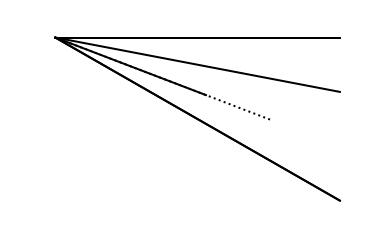

In [14]:
add_first_connections()

In [15]:
def add_second_connections():
    
        
    def add_rays(lvl0):
        pl.plot([c1, c2], [lvl0, lvls[0]], c='k', lw=lw)
        pl.plot([c1, c2], [lvl0, lvls[1]], c='k', lw=lw)
        pl.plot([c1, c2], [lvl0, lvls[3]], c='k', lw=lw)
        pl.plot([c1, c2], [lvl0, lvls[3]], c='k', lw=lw)

        lvl_m1 = (lvls[2]-lvl0) * ((cm1)/(c2-c1))+lvl0
        lvl_m2 = (lvls[2]-lvl0) * ((cm2)/(c2-c1))+lvl0
        pl.plot([c1, c1+cm1], [lvl0, lvl_m1], c='k', lw=lw)
        pl.plot([c1, c1+cm2], [lvl0, lvl_m2], c='k', lw=lw, ls=':')
    
        lvl_m1 = (lvls[2]-lvl0) * ((cm1)/(c2-c1))+lvl0
        lvl_m2 = (lvls[2]-lvl0) * ((cm2)/(c2-c1))+lvl0
        pl.plot([c2-cm1, c2], [lvl_m1, lvl0], c='k', lw=lw)
        pl.plot([c2-cm2, c2], [lvl_m2, lvl0], c='k', lw=lw, ls=':')
        
        
    
    lw=2
    lvl0 = -1.5
    lvls = [-0.5, -1.5, -2.5, -3.5]
    c1, c2, cm1, cm2 = 0.05, 0.9, 0.3, 0.35
    add_rays(lvl0=-1.5)
    add_rays(lvl0=-0.5)
    add_rays(lvl0=-3.5)
    
    pl.scatter([c2, c2, c2], [lvls[0], lvls[1], lvls[3]], s=500, zorder=100, c='w', lw=lw, edgecolor='k')
    pl.scatter([c2, c2, c2], [lvls[0], lvls[1], lvls[3]], marker='+', s=150, zorder=101, c='k', lw=2, edgecolor='k')

    pl.ylim(-4, 0)
    pl.xlim( 0, 1)
    pl.gca().axis('off')


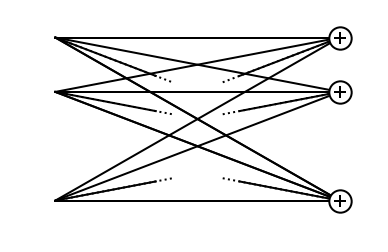

In [16]:
add_second_connections()

In [17]:
def add_third_connections():
    
        
    def add_rays(lvl0):
        
        for il in range(4):

            lvl_m1 = (lvls[il]-lvl0) * ((cm1)/(c2-c1))+lvl0
            lvl_m2 = (lvls[il]-lvl0) * ((cm2)/(c2-c1))+lvl0
            pl.plot([c1, c1+cm1], [lvl0, lvl_m1], c='k', lw=lw)
            pl.plot([c1, c1+cm2], [lvl0, lvl_m2], c='k', lw=lw, ls=':')

            lvl_m1 = (lvls[il]-lvl0) * ((cm1)/(c2-c1))+lvl0
            lvl_m2 = (lvls[il]-lvl0) * ((cm2)/(c2-c1))+lvl0
            pl.plot([c2-cm1, c2], [lvl_m1, lvl0], c='k', lw=lw)
            pl.plot([c2-cm2, c2], [lvl_m2, lvl0], c='k', lw=lw, ls=':')
        
    lw=2
    lvl0 = -1.5
    lvls = [-0.5, -1.5, -2.5, -3.5]
    c1, c2, cm1, cm2 = 0.05, 0.9, 0.2, 0.35
    add_rays(lvl0=-1.5)
    add_rays(lvl0=-0.5)
    add_rays(lvl0=-3.5)
    
    pl.scatter([c2, c2, c2], [lvls[0], lvls[1], lvls[3]], s=500, zorder=100, c='w', lw=lw, edgecolor='k')
    pl.scatter([c2, c2, c2], [lvls[0], lvls[1], lvls[3]], marker='+', s=150, zorder=101, c='k', lw=2, edgecolor='k')
    

    pl.ylim(-4, 0)
    pl.xlim( 0, 1)
    pl.gca().axis('off')


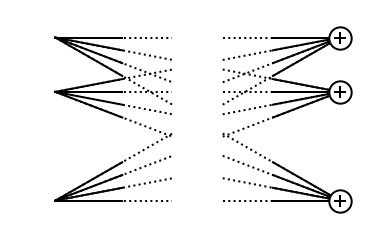

In [18]:
add_third_connections()

In [19]:
def add_fully_connected():

    def add_filled_rect(x1, x2, y1, y2, zorder, color='w', lw=2):
        pl.fill_between([x1, x2], [y1, y1], [y2, y2], zorder=zorder, color=color)
        pl.plot([x1, x2], [y1, y1], c='k', lw=lw, zorder=zorder)
        pl.plot([x1, x2], [y2, y2], c='k', lw=lw, zorder=zorder)
        pl.plot([x1, x1], [y1, y2], c='k', lw=lw, zorder=zorder)
        pl.plot([x2, x2], [y1, y2], c='k', lw=lw, zorder=zorder)

    lw = 2
    ss = 400
    r1, r2 = 0.1, 3.9
    x1, x2, x3, x4, x5  = 0.1, 0.15, 0.3, 0.5, 0.7
    lvl1, lvl2, lvl3 = 1, 3, 2.5
    o1, o2 = 1.8, 2.2
    
    add_filled_rect(x1=x1, x2=x2, y1=r1, y2=1, zorder=10, color='lightgray')   
    add_filled_rect(x1=x1, x2=x2, y1=1, y2=2, zorder=10, color='white')   
    add_filled_rect(x1=x1, x2=x2, y1=2, y2=3, zorder=10, color='lightgray')   
    add_filled_rect(x1=x1, x2=x2, y1=3, y2=r2, zorder=10, color='white')   
    
    pl.plot([x2, x3], [r1, lvl1], c='k', lw=lw)
    pl.plot([x2, x3], [r2, lvl2], c='k', lw=lw)
    
    pl.scatter([x3, x3, x3], [lvl1, lvl2, lvl3], c='w', s=ss, edgecolor='k', lw=lw, zorder=100)
    pl.scatter([x4, x4, x4], [lvl1, lvl2, lvl3], c='w', s=ss, edgecolor='k', lw=lw, zorder=100)
    
    pl.plot([x3, x4], [lvl1, lvl1], c='k', lw=lw)
    pl.plot([x3, x4], [lvl2, lvl2], c='k', lw=lw)
    pl.plot([x3, x4], [lvl1, lvl2], c='k', lw=lw)
    pl.plot([x4, x3], [lvl1, lvl2], c='k', lw=lw)
    pl.plot([x4, x3], [lvl3, lvl3], c='k', lw=lw)
    pl.plot([x4, x3], [lvl3, lvl2], c='k', lw=lw)
    pl.plot([x3, x4], [lvl3, lvl2], c='k', lw=lw)

    pl.plot([x4, x3], [lvl3, lvl1], c='k', lw=lw)
    pl.plot([x3, x4], [lvl3, lvl1], c='k', lw=lw)

    pl.scatter([x5, x5], [o1, o2], s=ss, c='w', edgecolor='k', lw=lw, zorder=100)

    pl.plot([x4, x5], [lvl1, o1], c='k', lw=lw)
    pl.plot([x4, x5], [lvl1, o2], c='k', lw=lw)
    pl.plot([x4, x5], [lvl2, o1], c='k', lw=lw)
    pl.plot([x4, x5], [lvl2, o2], c='k', lw=lw)
    pl.plot([x4, x5], [lvl3, o1], c='k', lw=lw)
    pl.plot([x4, x5], [lvl3, o2], c='k', lw=lw)    
    
    d1, d2 = 1.5, 2.
    pl.plot([x4, x4], [d1, d2], ':', c='k')
    pl.plot([x3, x3], [d1, d2], ':', c='k')

    pl.plot([x1-0.05, x1], [r1, r1], c='k', lw=lw)
    pl.plot([x1-0.05, x1], [r2, r2], c='k', lw=lw)

    
    pl.ylim(-0.5, 4.5)
    pl.xlim( 0, 0.8)

    pl.gca().axis('off')



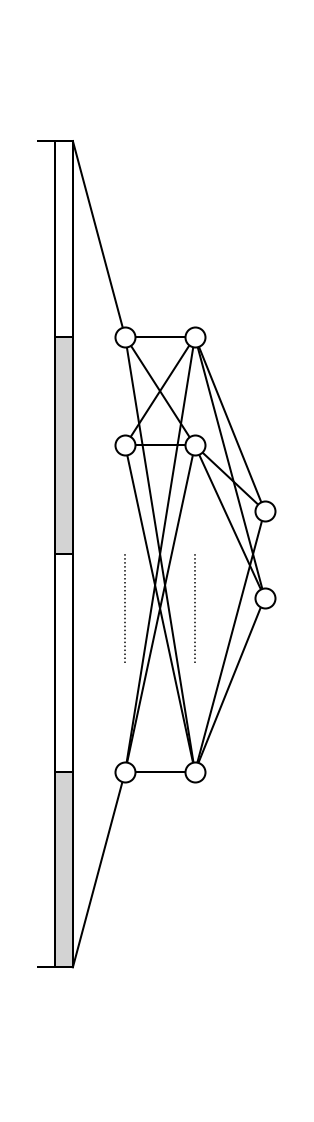

In [20]:
pl.figure(figsize=(1*5, 4*5))
add_fully_connected()

In [21]:
def add_text(text_str, ypos=0.9, fontsize=25):
    
    pl.text(x=0, y=ypos, s=text_str, horizontalalignment='center', verticalalignment='center', fontsize=fontsize, fontname='courier')
    pl.ylim(-1,1)
    pl.xlim(-1,1)
    pl.gca().axis('off')



/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


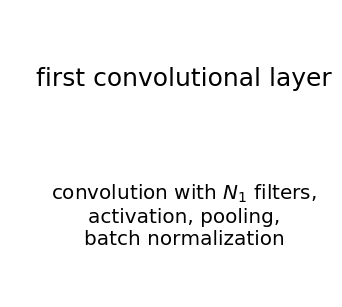

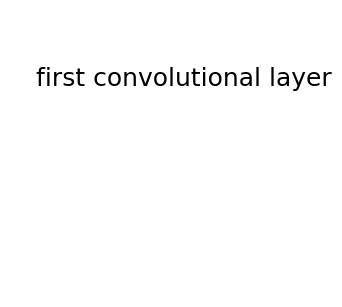

In [22]:
pl.figure(figsize=(5,5))
add_text("first convolutional layer", ypos=0.5, fontsize=25)
add_text("convolution with $N_1$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.5, fontsize=20)
pl.figure(figsize=(5,5))
add_text("first convolutional layer", ypos=0.5)

In [23]:
npix = hp.nside2npix(16)
map_data = np.arange(npix)
# map_data = hp.read_map('/Users/tomek/notes/160223_advanced_stats_methods/ASM_2017/ASM/Lectures/CMB/COM_CMB_IQU-smica_1024_R2.02_full.fits')
# map_data = hp.ud_grade(map_data, nside_out=16).astype(np.float32)
# map_data -= np.min(map_data)
# map_data /= np.max(map_data)

npix = hp.nside2npix(4)
map_test1 = np.arange(npix)
npix = hp.nside2npix(2)
map_test2 = np.arange(npix)
npix = hp.nside2npix(1)
map_test3 = np.arange(npix)
list_col_maps = [map_test1, map_test2, map_test3]

In [24]:
list_col_filters = [None]*9
list_col_filters[0] = np.array([ 11.25365034,   0.,   -1.18938064,   0.,   -0.05086713, 0. ])
list_col_filters[1] = np.array([-9.78160805 ,   0.,   -1.42653875,   0.,   -1.38142099, 0. ])
list_col_filters[2] = np.array([-18.02216716,   0.,   0.94142343 ,   0.,   -0.84953354, 0. ])
list_col_filters[3] = np.array([-0.66255557 ,   0.,   -0.69860735,   0.,   -0.4712247 , 0. ])
list_col_filters[4] = np.array([-1.04785434 ,   0.,   -0.88448022,   0.,   -0.0026601 , 0. ])
list_col_filters[5] = np.array([ 0.43662062 ,   0.,   -1.45210374,   0.,   -1.74437622, 0. ])
list_col_filters[6] = np.array([ 2.25798642 ,   0.,   -5.75147804,   0.,   -1.29044244, 0. ])
list_col_filters[7] = np.array([ 4.52246711 ,   0.,   6.6445827  ,   0.,   -1.43355173, 0. ])
list_col_filters[8] = np.array([ 9.21127193 ,   0.,   -1.05796129,   0.,   -0.87348753, 0. ])

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.


/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


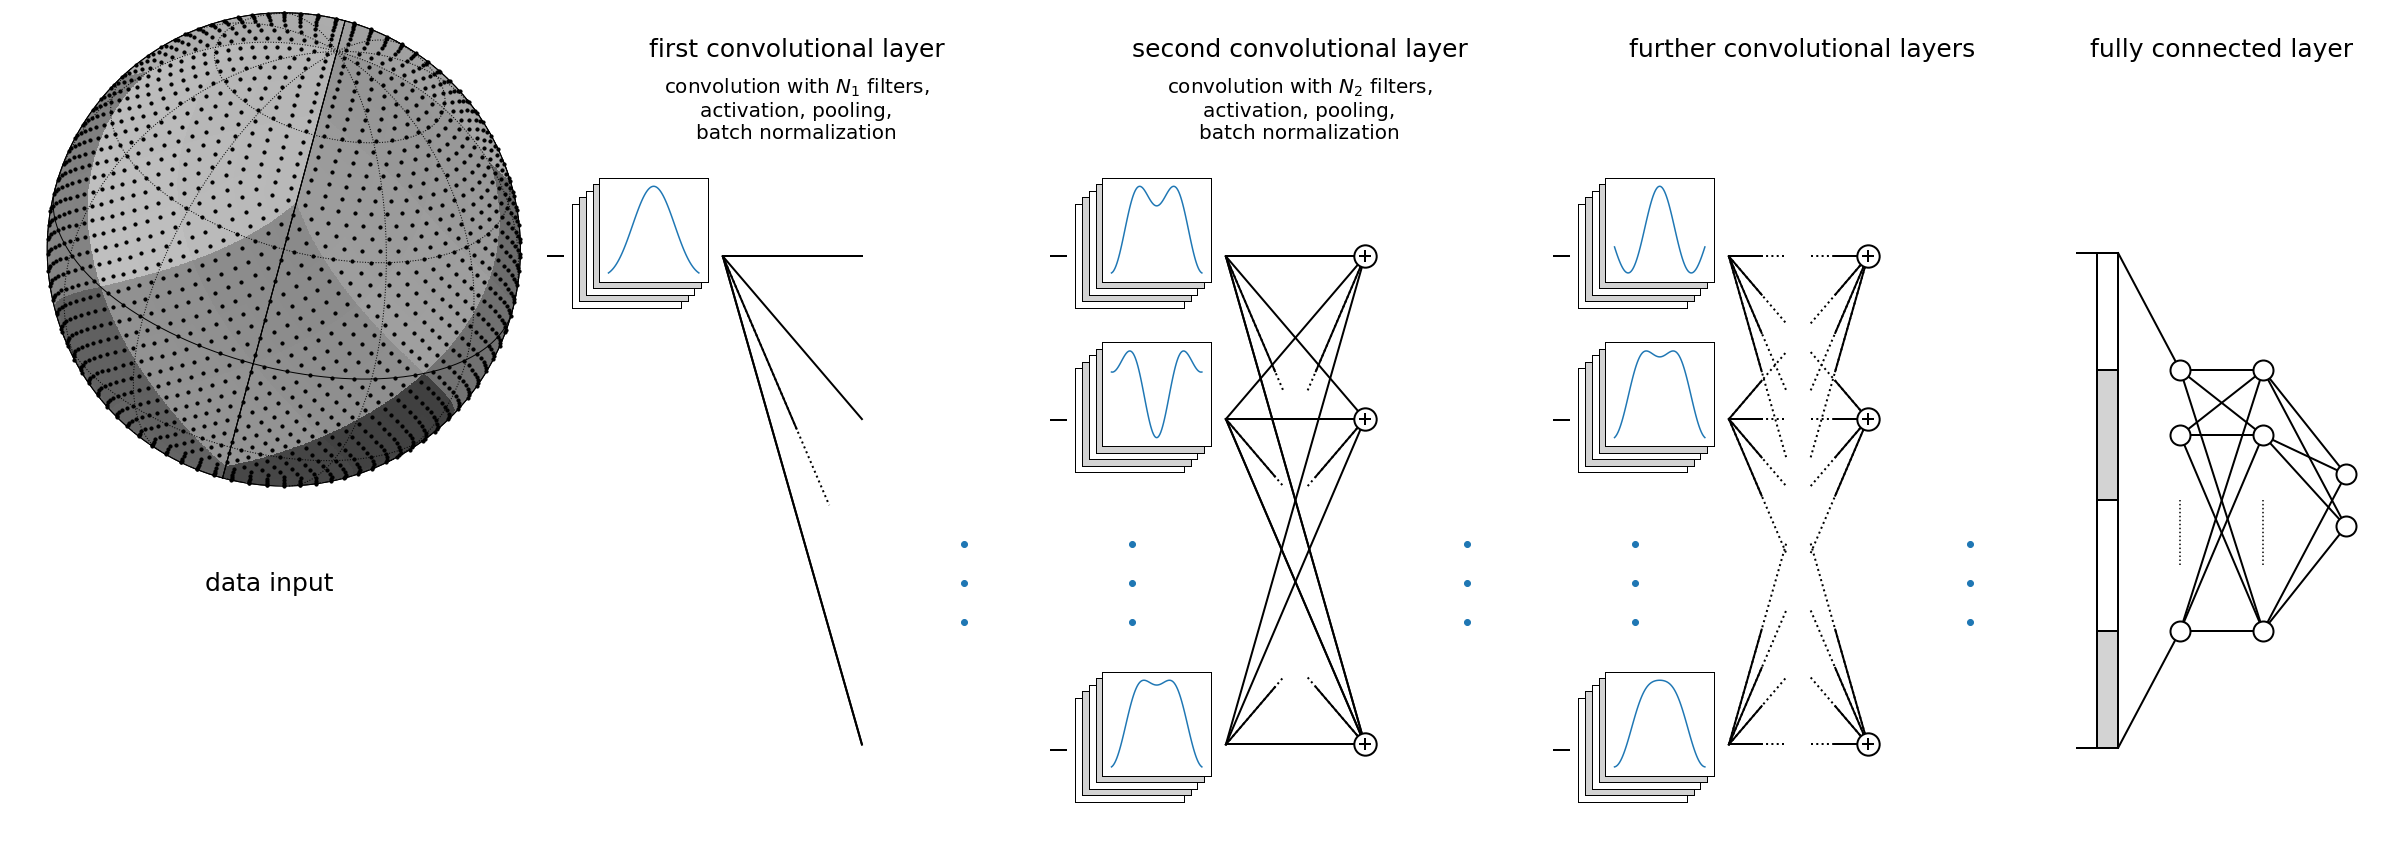

In [25]:
import matplotlib.gridspec as gridspec

nr, nc, psr, psc, dr = 5, 15, 3, 3, 1

pl.figure(figsize=(nc*psc,nr*psr))
gs = gridspec.GridSpec(nr, nc)

# real data axis
ax1 = plt.subplot(gs[0:3, 0:3])
plt.axes(ax1)
make_ball(map_data)

# first filter stack
icol = 3
ax1 = plt.subplot(gs[0+dr, icol])
add_filter_stack(list_col_filters[0])

# first connections
icol = 4
ax1 = plt.subplot(gs[dr:, icol])
add_first_connections()

# first spheres
icol, imap = 5, 0
# ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
# ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])

# second filter stacks
icol = 6
ax = plt.subplot(gs[0+dr, icol])
add_filter_stack(list_col_filters[1])
ax = plt.subplot(gs[1+dr, icol])
add_filter_stack(list_col_filters[2])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
add_filter_stack(list_col_filters[3])

# second connections
icol = 7
ax1 = plt.subplot(gs[dr:, icol])
add_second_connections()

# second spheres
icol, imap = 8, 1
# ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
# ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])

# third filter stacks
icol = 9
ax = plt.subplot(gs[0+dr, icol])
add_filter_stack(list_col_filters[4])
ax = plt.subplot(gs[1+dr, icol])
add_filter_stack(list_col_filters[5])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
add_filter_stack(list_col_filters[6])

# third connections
icol = 10
ax1 = plt.subplot(gs[dr:, icol])
add_third_connections()

# last spheres
icol, imap = 11, 2
# ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
ax = plt.subplot(gs[2+dr, icol])
add_dots_vertical()
# ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])

# fully connected and output
icol = 12
ax = plt.subplot(gs[dr:, (icol):(icol+2)])
add_fully_connected()


ax = plt.subplot(gs[3, :3])  
add_text(text_str='data input      ', ypos=0., fontsize=25)


# text
ax = plt.subplot(gs[0, 3:6])
add_text("first convolutional layer", ypos=0.5, fontsize=25)
add_text("convolution with $N_1$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

ax = plt.subplot(gs[0, 6:9])
add_text("second convolutional layer", ypos=0.5, fontsize=25)
add_text("convolution with $N_2$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

ax = plt.subplot(gs[0, 9:12])
add_text(text_str="further convolutional layers", ypos=0.5, fontsize=25)

ax = plt.subplot(gs[0, 12:14])
add_text(text_str="fully connected layer", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 8])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 10:12])
# add_text(text_str='convolutions with $N_m$\nradial filters,\nactivation,\nbatch normalisation')

# ax = plt.subplot(gs[0, 12])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 13:])
# add_text(text_str='fully connected layers\nand output')

plt.subplots_adjust(wspace=0.025, hspace=0.05)
plt.savefig(os.path.join(pathfig, 'figure_architecture_v3.part1.svg'), bbox_inches='tight', transparent=True)

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

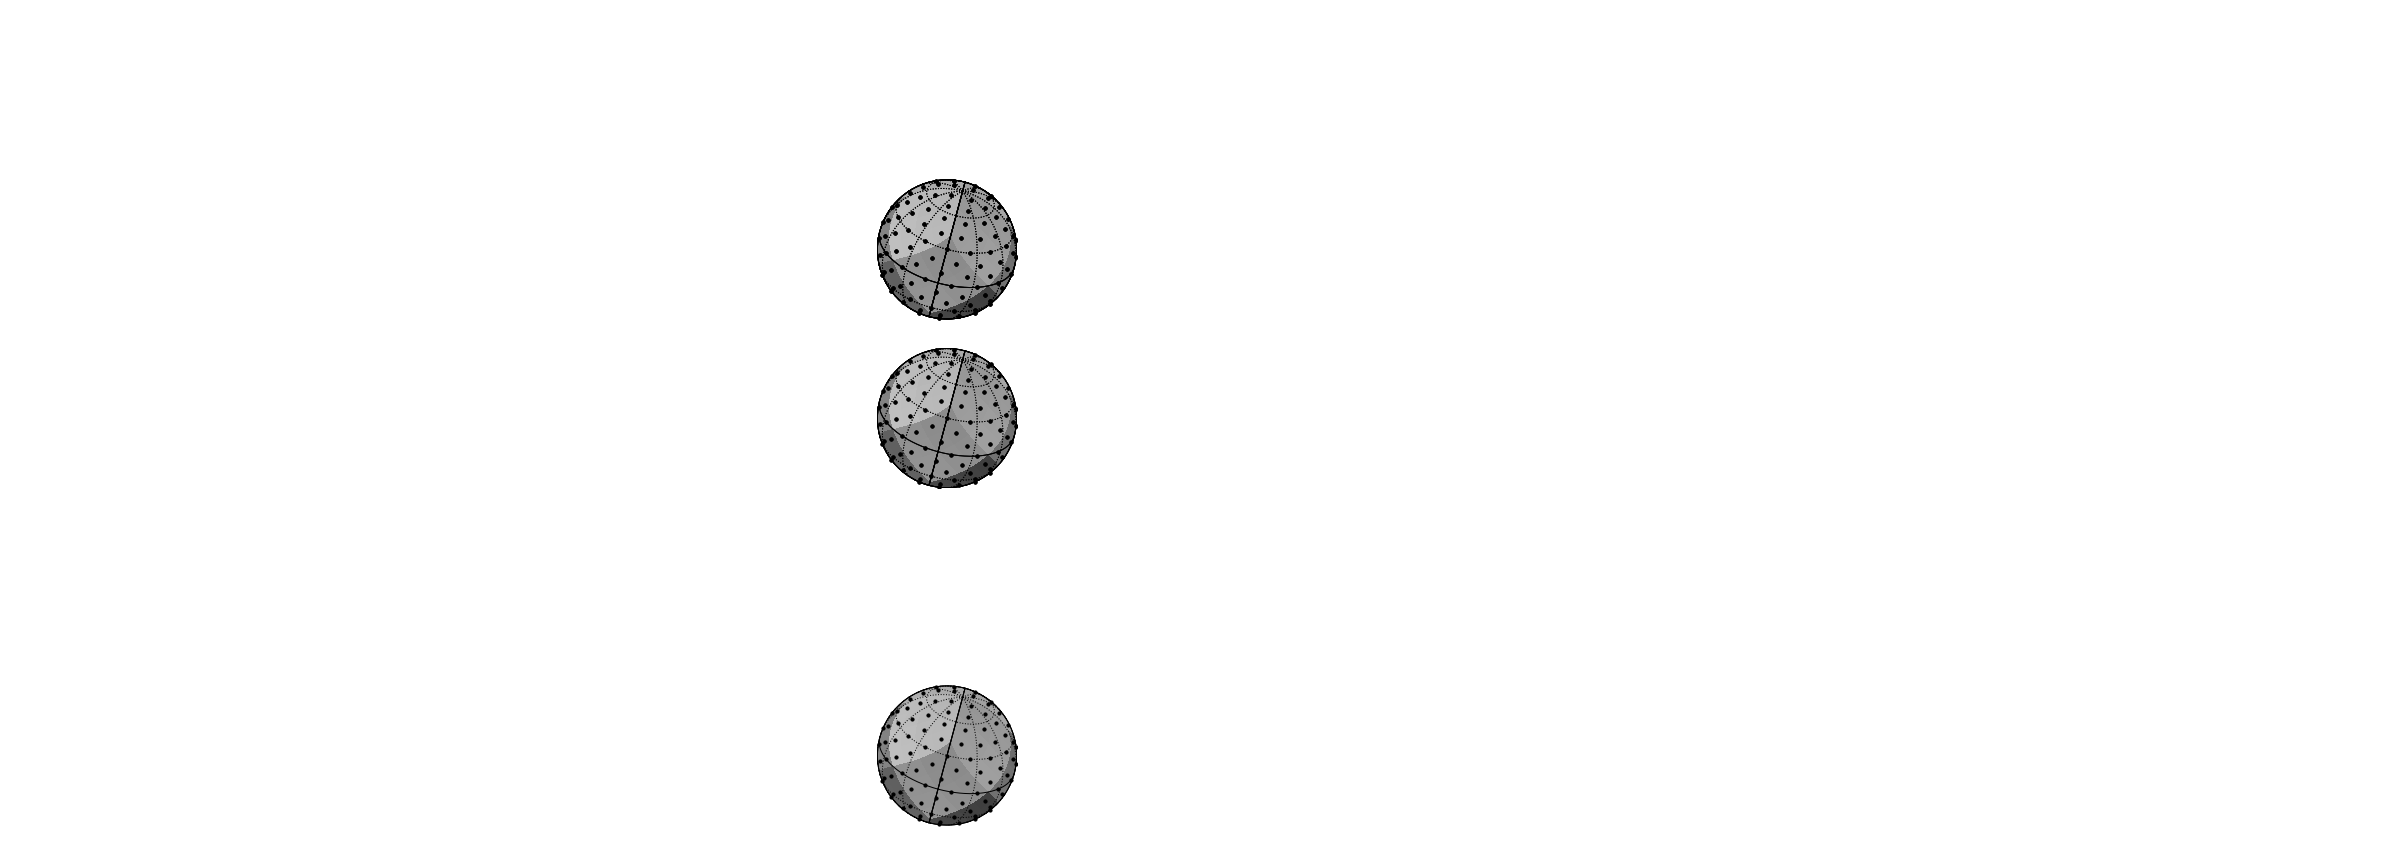

In [26]:
import matplotlib.gridspec as gridspec

nr, nc, psr, psc, dr = 5, 15, 3, 3, 1

pl.figure(figsize=(nc*psc,nr*psr))
gs = gridspec.GridSpec(nr, nc)

# real data axis
ax1 = plt.subplot(gs[0:3, 0:3])
plt.axes(ax1)
pl.gca().axis('off')
# make_ball(map_data)

# first filter stack
icol = 3
ax1 = plt.subplot(gs[0+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[0])

# first connections
icol = 4
ax1 = plt.subplot(gs[dr:, icol])
# add_first_connections()
pl.gca().axis('off')


# first spheres
icol, imap = 5, 0
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])

# second filter stacks
icol = 6
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[1])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[2])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
pl.gca().axis('off')
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[3])

# second connections
icol = 7
ax1 = plt.subplot(gs[dr:, icol])
# add_second_connections()
pl.gca().axis('off')



# second spheres
icol, imap = 8, 1
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')

# third filter stacks
icol = 9
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[4])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[5])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# add_filter_stack(list_col_filters[6])
pl.gca().axis('off')

# third connections
icol = 10
ax1 = plt.subplot(gs[dr:, icol])
# add_third_connections()
pl.gca().axis('off')

# last spheres
icol, imap = 11, 2
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')

# fully connected and output
icol = 12
ax = plt.subplot(gs[dr:, (icol):(icol+2)])
# add_fully_connected()
pl.gca().axis('off')

# ax = plt.subplot(gs[3, :3])  
# add_text(text_str='data input      ', ypos=0., fontsize=25)


# text
# ax = plt.subplot(gs[0, 3:6])
# add_text("first convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_1$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 6:9])
# add_text("second convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_2$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 9:12])
# add_text(text_str="further convolutional layers", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 12:14])
# add_text(text_str="fully connected layer", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 8])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 10:12])
# add_text(text_str='convolutions with $N_m$\nradial filters,\nactivation,\nbatch normalisation')

# ax = plt.subplot(gs[0, 12])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 13:])
# add_text(text_str='fully connected layers\nand output')

plt.subplots_adjust(wspace=0.025, hspace=0.05)
plt.savefig(os.path.join(pathfig,'figure_architecture_v3.part2.svg'), bbox_inches='tight', transparent=True)

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

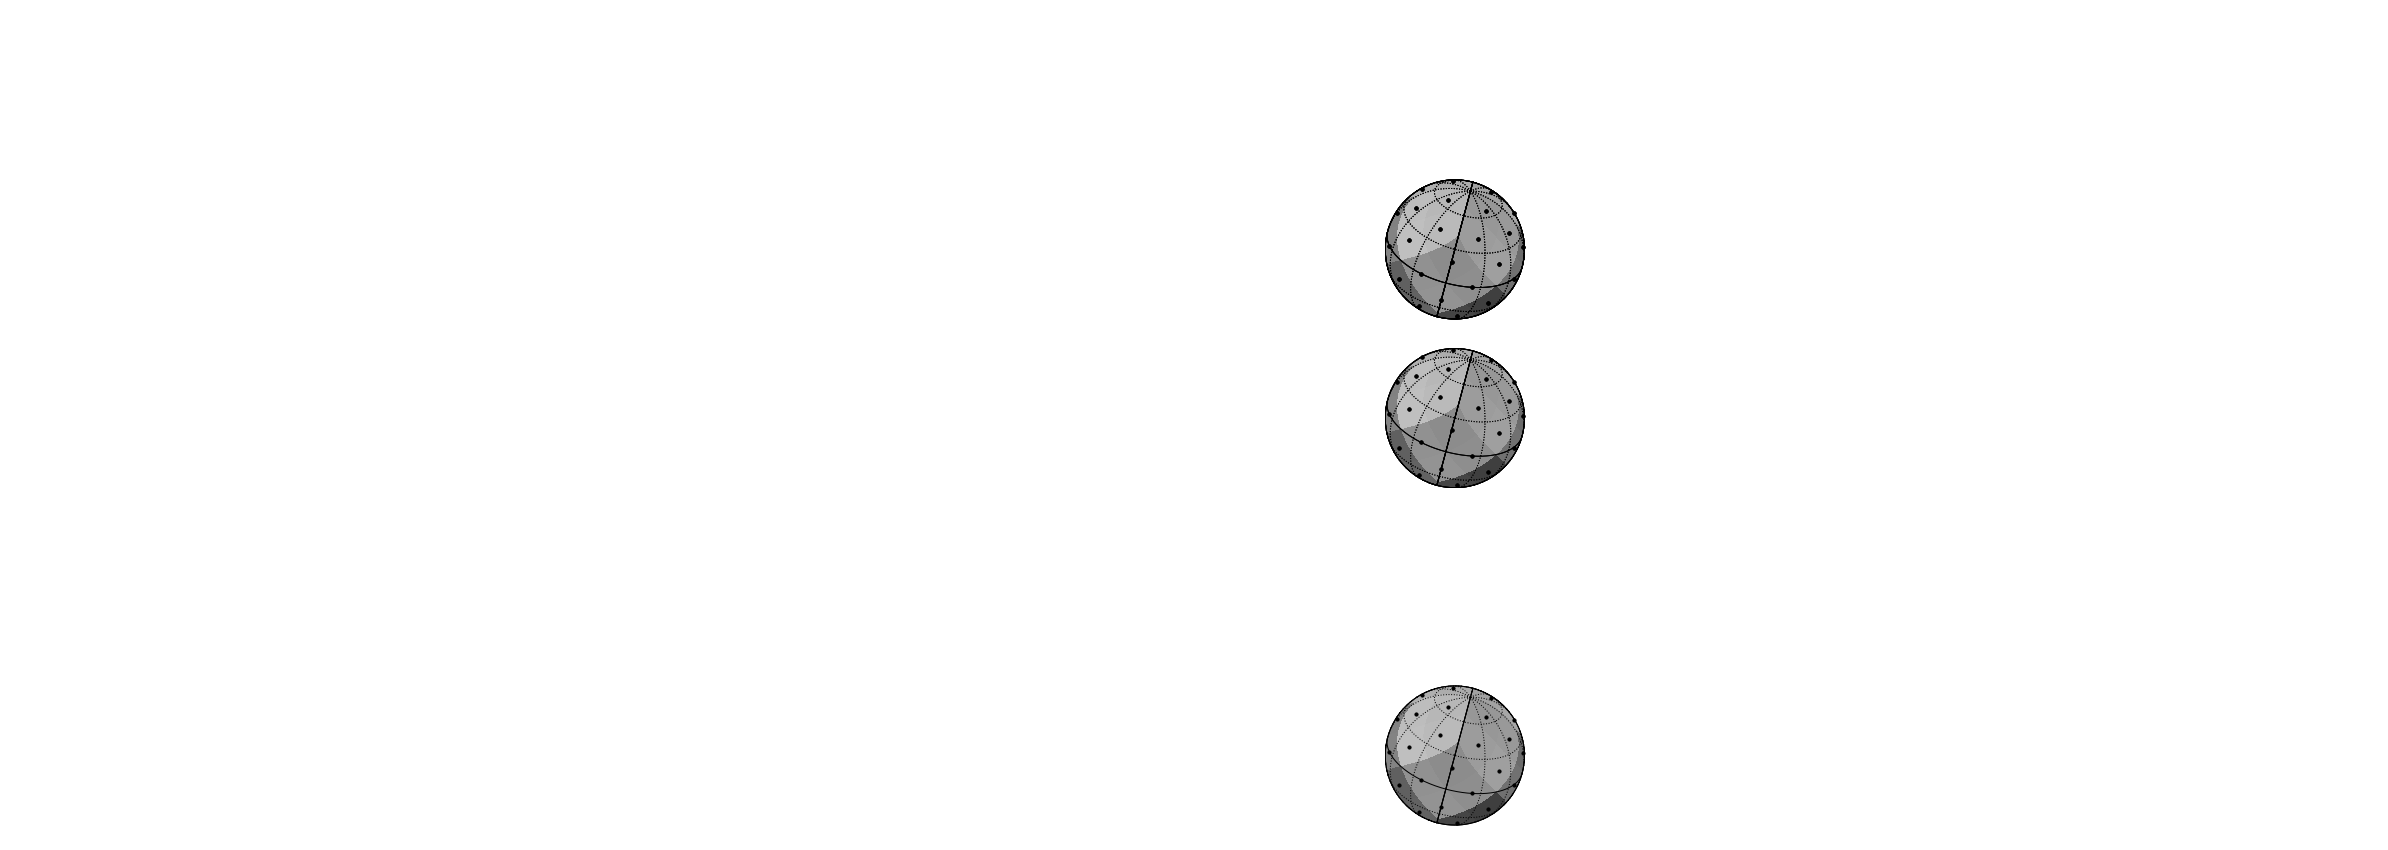

In [27]:
import matplotlib.gridspec as gridspec

nr, nc, psr, psc, dr = 5, 15, 3, 3, 1

pl.figure(figsize=(nc*psc,nr*psr))
gs = gridspec.GridSpec(nr, nc)

# real data axis
ax1 = plt.subplot(gs[0:3, 0:3])
plt.axes(ax1)
pl.gca().axis('off')
# make_ball(map_data)

# first filter stack
icol = 3
ax1 = plt.subplot(gs[0+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[0])

# first connections
icol = 4
ax1 = plt.subplot(gs[dr:, icol])
# add_first_connections()
pl.gca().axis('off')


# first spheres
icol, imap = 5, 0
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')


# second filter stacks
icol = 6
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[1])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[2])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
pl.gca().axis('off')
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[3])

# second connections
icol = 7
ax1 = plt.subplot(gs[dr:, icol])
# add_second_connections()
pl.gca().axis('off')



# second spheres
icol, imap = 8, 1
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')

# third filter stacks
icol = 9
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[4])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[5])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# add_filter_stack(list_col_filters[6])
pl.gca().axis('off')

# third connections
icol = 10
ax1 = plt.subplot(gs[dr:, icol])
# add_third_connections()
pl.gca().axis('off')

# last spheres
icol, imap = 11, 2
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')

# fully connected and output
icol = 12
ax = plt.subplot(gs[dr:, (icol):(icol+2)])
# add_fully_connected()
pl.gca().axis('off')

# ax = plt.subplot(gs[3, :3])  
# add_text(text_str='data input      ', ypos=0., fontsize=25)


# text
# ax = plt.subplot(gs[0, 3:6])
# add_text("first convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_1$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 6:9])
# add_text("second convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_2$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 9:12])
# add_text(text_str="further convolutional layers", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 12:14])
# add_text(text_str="fully connected layer", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 8])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 10:12])
# add_text(text_str='convolutions with $N_m$\nradial filters,\nactivation,\nbatch normalisation')

# ax = plt.subplot(gs[0, 12])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 13:])
# add_text(text_str='fully connected layers\nand output')

plt.subplots_adjust(wspace=0.025, hspace=0.05)
plt.savefig(os.path.join(pathfig,'figure_architecture_v3.part3.svg'), bbox_inches='tight', transparent=True)

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The inter

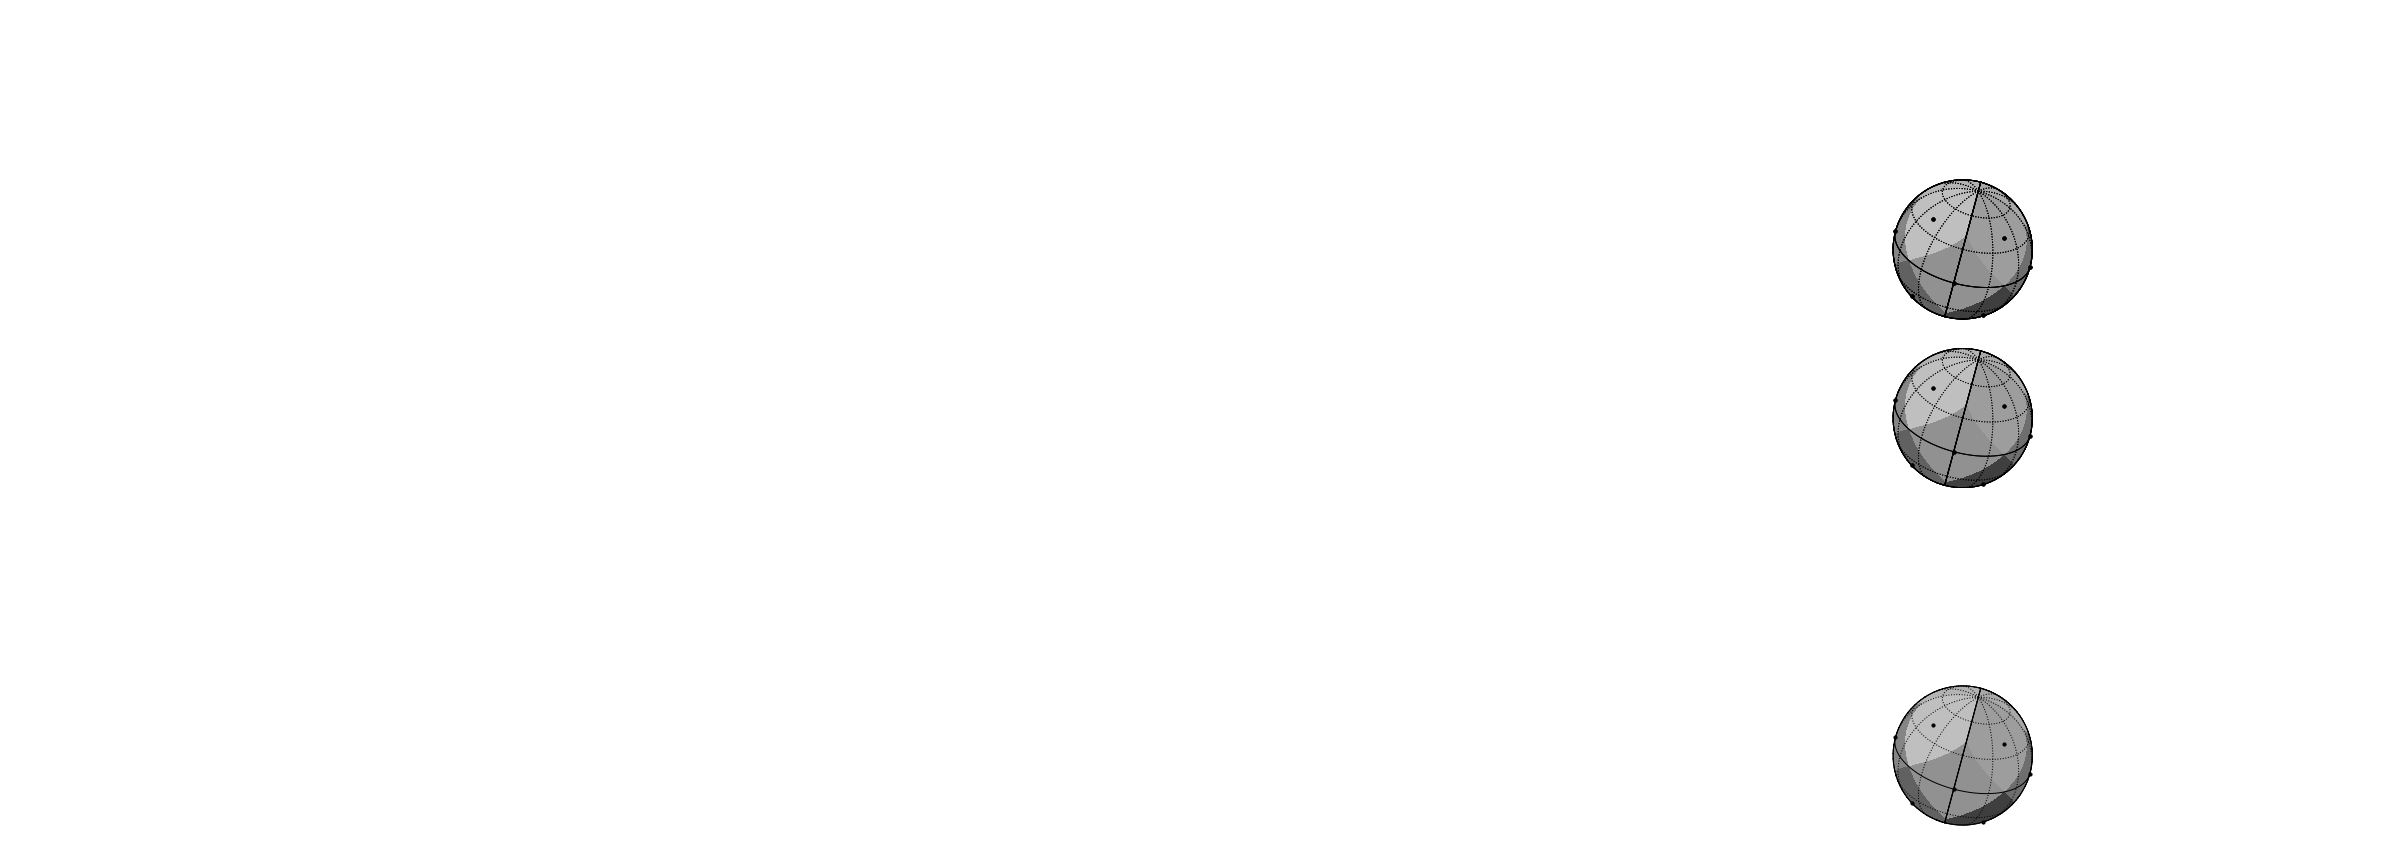

In [28]:
import matplotlib.gridspec as gridspec

nr, nc, psr, psc, dr = 5, 15, 3, 3, 1

pl.figure(figsize=(nc*psc,nr*psr))
gs = gridspec.GridSpec(nr, nc)

# real data axis
ax1 = plt.subplot(gs[0:3, 0:3])
plt.axes(ax1)
pl.gca().axis('off')
# make_ball(map_data)

# first filter stack
icol = 3
ax1 = plt.subplot(gs[0+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[0])

# first connections
icol = 4
ax1 = plt.subplot(gs[dr:, icol])
# add_first_connections()
pl.gca().axis('off')


# first spheres
icol, imap = 5, 0
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')


# second filter stacks
icol = 6
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[1])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[2])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
pl.gca().axis('off')
# add_dots_vertical()
ax = plt.subplot(gs[3+dr, icol])
pl.gca().axis('off')
# add_filter_stack(list_col_filters[3])

# second connections
icol = 7
ax1 = plt.subplot(gs[dr:, icol])
# add_second_connections()
pl.gca().axis('off')



# second spheres
icol, imap = 8, 1
ax = plt.subplot(gs[0+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# make_ball(list_col_maps[imap])
pl.gca().axis('off')

# third filter stacks
icol = 9
ax = plt.subplot(gs[0+dr, icol])
# add_filter_stack(list_col_filters[4])
pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
# add_filter_stack(list_col_filters[5])
pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
# add_filter_stack(list_col_filters[6])
pl.gca().axis('off')

# third connections
icol = 10
ax1 = plt.subplot(gs[dr:, icol])
# add_third_connections()
pl.gca().axis('off')

# last spheres
icol, imap = 11, 2
ax = plt.subplot(gs[0+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')
ax = plt.subplot(gs[1+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')
ax = plt.subplot(gs[2+dr, icol])
# add_dots_vertical()
pl.gca().axis('off')
ax = plt.subplot(gs[3+dr, icol])
make_ball(list_col_maps[imap])
# pl.gca().axis('off')

# fully connected and output
icol = 12
ax = plt.subplot(gs[dr:, (icol):(icol+2)])
# add_fully_connected()
pl.gca().axis('off')

# ax = plt.subplot(gs[3, :3])  
# add_text(text_str='data input      ', ypos=0., fontsize=25)


# text
# ax = plt.subplot(gs[0, 3:6])
# add_text("first convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_1$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 6:9])
# add_text("second convolutional layer", ypos=0.5, fontsize=25)
# add_text("convolution with $N_2$ filters,\nactivation, pooling,\nbatch normalization", ypos=-0.25, fontsize=20)

# ax = plt.subplot(gs[0, 9:12])
# add_text(text_str="further convolutional layers", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 12:14])
# add_text(text_str="fully connected layer", ypos=0.5, fontsize=25)

# ax = plt.subplot(gs[0, 8])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 10:12])
# add_text(text_str='convolutions with $N_m$\nradial filters,\nactivation,\nbatch normalisation')

# ax = plt.subplot(gs[0, 12])
# add_text(text_str='downsampling,\npooling')

# ax = plt.subplot(gs[0, 13:])
# add_text(text_str='fully connected layers\nand output')

plt.subplots_adjust(wspace=0.025, hspace=0.05)
plt.savefig(os.path.join(pathfig,'figure_architecture_v3.part4.svg'), bbox_inches='tight', transparent=True)

In [29]:
import svgutils.compose as sc
from IPython.display import SVG

In [30]:
svg_fig = sc.Figure('{:d}cm'.format(int(85.*0.8)), '{:d}cm'.format(int(30.*0.8)),  
                    sc.SVG(os.path.join(pathfig,"figure_architecture_v3.part1.svg")).scale(1).move(0, 0),
                    sc.SVG(os.path.join(pathfig,"figure_architecture_v3.part2.svg")).scale(1).move(0, 0),
                    sc.SVG(os.path.join(pathfig,"figure_architecture_v3.part3.svg")).scale(1).move(0, 0),
                    sc.SVG(os.path.join(pathfig,"figure_architecture_v3.part4.svg")).scale(1).move(0, 0)
                   )
svg_fig.save(os.path.join(pathfig,"figure_architecture_v3.svg"))
SVG(os.path.join(pathfig,'figure_architecture_v3.svg'))